In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

![avatar](./images/histogram.jpg)
*cv2.calcHist(images,channels,mask,hiseSize,ranges)*
 - images 原图像格式为uint8或float32，当传入函数时应使用中括号例如[img]
 - channels 同样用中括号括起来，如果传入的图像为灰度图，那么它的值为[0]，如果为彩色图像，则可为[0][1][2]分别对应 BGR
 - mask：掩模图像，统计整幅图的直方图就把它设为None，但是如果是统计图像的某一部分，则就制作一个掩模图像并使用它
 - histSize: BIN的数目。也应用中括号括起来
 - ranges： 像素值范围常为[0-256]

In [3]:
img = cv2.imread('images/cat.82.jpg',0) # 0表示灰度图
hist = cv2.calcHist([img],[0],None,[256],[0,256])
hist.shape

(256, 1)

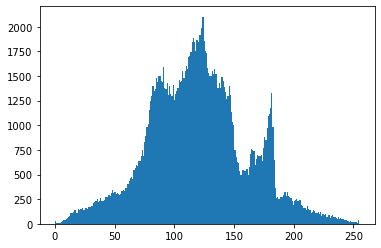

In [6]:
plt.hist(img.ravel(),256)
plt.show()

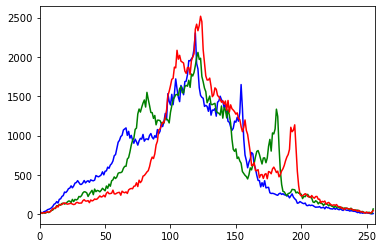

In [7]:
img = cv2.imread('images/cat.82.jpg')
color = ['b','g','r']
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color=col)
    plt.xlim([0,256])

#### mask 操作

In [12]:
def cv_show(name,src):
    cv2.imshow(name,src)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [24]:
mask = np.zeros(img.shape[:2],np.uint8)
mask[50:200,50:300] = 255
cv_show('mask',mask)

In [25]:
img = cv2.imread('images/dog.1234.jpg',0)
cv_show('img',img)

In [26]:
masked_img = cv2.bitwise_and(img,img,mask=mask) # 与操作
cv_show('masked',masked_img)

In [28]:
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

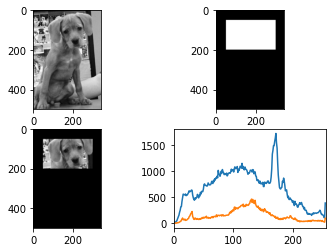

In [29]:
plt.subplot(221),plt.imshow(img,'gray')
plt.subplot(222),plt.imshow(mask,'gray')
plt.subplot(223),plt.imshow(masked_img,'gray')
plt.subplot(224),plt.plot(hist_full),plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

#### 直方图均衡化
![avatar](./images/Histequal.jpg)
![avatar](./images/math_hist.jpg)

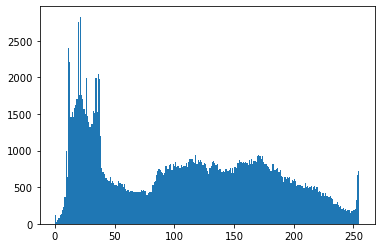

In [43]:
img = cv2.imread('images/dog.1124.jpg',0)
plt.hist(img.ravel(),256)
plt.show()

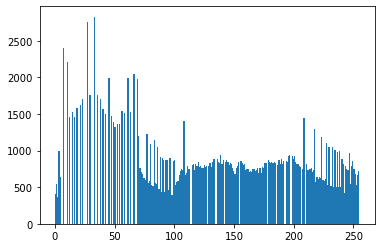

In [44]:
equ = cv2.equalizeHist(img)
plt.hist(equ.ravel(),256)
plt.show()

In [45]:
res = np.hstack([img,equ])
cv_show('res',res)


 *不一定均衡化之后图像效果就会变好，有时候均衡化会使图像丢失一些细节*
 *可以分模块进行均衡化 ———> 自适应直方图均衡化*

In [46]:
clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))

In [47]:
res_clahe = clahe.apply(img)
res = np.hstack([img,equ,res_clahe])
cv_show('res',res)